In [40]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

SEED = 1234

In [41]:
df = pd.read_csv('../data/data_multidim/country_profile_variables.csv')

In [42]:
df.head(10)

,country,Region,Surface area (km2),Population in thousands (2017),"Population density (per km2, 2017)","Sex ratio (m per 100 f, 2017)",GDP: Gross domestic product (million current US$),"GDP growth rate (annual %, const. 2005 prices)",GDP per capita (current US$),Economy: Agriculture (% of GVA),...,Mobile-cellular subscriptions (per 100 inhabitants).1,Individuals using the Internet (per 100 inhabitants),Threatened species (number),Forested area (% of land area),CO2 emission estimates (million tons/tons per capita),"Energy production, primary (Petajoules)",Energy supply per capita (Gigajoules),"Pop. using improved drinking water (urban/rural, %)","Pop. using improved sanitation facilities (urban/rural, %)",Net Official Development Assist. received (% of GNI)
0,Afghanistan,SouthernAsia,652864,35530,54.4,106.3,20270,-2.4,623.2,23.3,...,8.3,42,2.1,9.8/0.3,63,5,78.2/47.0,45.1/27.0,21.43,-99
1,Albania,SouthernEurope,28748,2930,106.9,101.9,11541,2.6,3984.2,22.4,...,63.3,130,28.2,5.7/2.0,84,36,94.9/95.2,95.5/90.2,2.96,-99
2,Algeria,NorthernAfrica,2381741,41318,17.3,102.0,164779,3.8,4154.1,12.2,...,38.2,135,0.8,145.4/3.7,5900,55,84.3/81.8,89.8/82.2,0.05,-99
3,American Samoa,Polynesia,199,56,278.2,103.6,-99,-99,-99.0,-99,...,-99,92,87.9,-99,-99,-99,100.0/100.0,62.5/62.5,-99,-99
4,Andorra,SouthernEurope,468,77,163.8,102.3,2812,0.8,39896.4,0.5,...,96.9,13,34.0,0.5/6.4,1,119,100.0/100.0,100.0/100.0,-99,-99
5,Angola,MiddleAfrica,1246700,29784,23.9,96.2,117955,3.0,4714.1,6.8,...,12.4,146,46.5,34.8/1.4,3902,25,75.4/28.2,88.6/22.5,0.42,-99
6,Anguilla,Caribbean,91,15,165.7,97.6,320,2.9,21879.6,2.3,...,76.0,52,61.1,0.1/9.8,0,136,94.6/...,97.9/...,-99,-99
7,Antigua and Barbuda,Caribbean,442,102,231.8,92.3,1356,4.1,14764.5,1.9,...,65.2,55,22.3,0.5/5.8,-99,84,97.9/97.9,91.4/91.4,0.12,-99
8,Argentina,SouthAmerica,2780400,44271,16.2,95.9,632343,2.4,14564.5,6.0,...,69.4,256,10.0,204.0/4.7,3167,85,99.0/100.0,96.2/98.3,0.01,-99
9,Armenia,WesternAsia,29743,2930,102.9,88.8,10529,3.0,3489.1,19.0,...,58.2,114,11.7,5.5/1.8,48,46,100.0/100.0,96.2/78.2,3.17,-99


In [43]:
df.dtypes

country                                                        object
Region                                                         object
Surface area (km2)                                             object
Population in thousands (2017)                                  int64
Population density (per km2, 2017)                            float64
Sex ratio (m per 100 f, 2017)                                 float64
GDP: Gross domestic product (million current US$)               int64
GDP growth rate (annual %, const. 2005 prices)                 object
GDP per capita (current US$)                                  float64
Economy: Agriculture (% of GVA)                                object
Economy: Industry (% of GVA)                                  float64
Economy: Services and other activity (% of GVA)               float64
Employment: Agriculture (% of employed)                        object
Employment: Industry (% of employed)                           object
Employment: Services

In [55]:
df['GDP growth rate (annual %, const. 2005 prices)'] = pd.to_numeric(df['GDP growth rate (annual %, const. 2005 prices)'], errors='coerce')
df['GDP growth rate (annual %, const. 2005 prices)'] = df['GDP growth rate (annual %, const. 2005 prices)'].apply(lambda x: np.nan if x == -99.0 else x)

In [68]:
df['Employment: Agriculture (% of employed)'].isnull().sum()

35

In [61]:
df['Employment: Agriculture (% of employed)'] = pd.to_numeric(df['Employment: Agriculture (% of employed)'], errors='coerce')
df['Employment: Agriculture (% of employed)'] = df['Employment: Agriculture (% of employed)'].apply(lambda x: np.nan if x == -99 else x)

In [34]:
df_var = df.drop(['geo'], axis=1)

In [35]:
scaler = StandardScaler()
scaler.fit(df_var)
X_transform = pd.DataFrame(scaler.transform(df_var), columns=df_var.columns)

In [36]:
%%time
tsne = TSNE(random_state=SEED, init='pca', n_jobs=-1)
X_tsne = tsne.fit_transform(X_transform)

Wall time: 464 ms


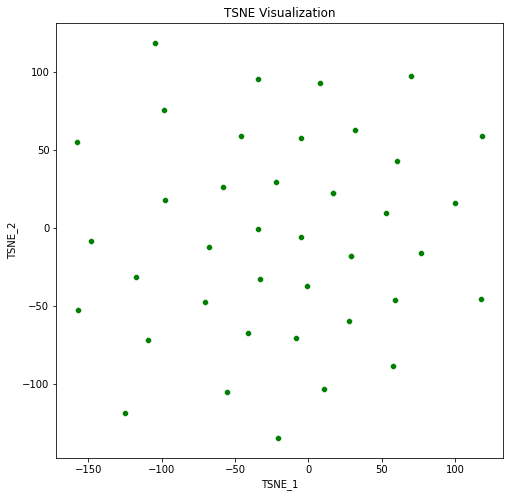

In [37]:
X_tsne = pd.DataFrame(X_tsne , columns=['TSNE_1', 'TSNE_2'])
plt.figure(figsize=(8, 8)) 
sns.scatterplot(data=X_tsne, x='TSNE_1', y='TSNE_2', color='green').set_title('TSNE Visualization');

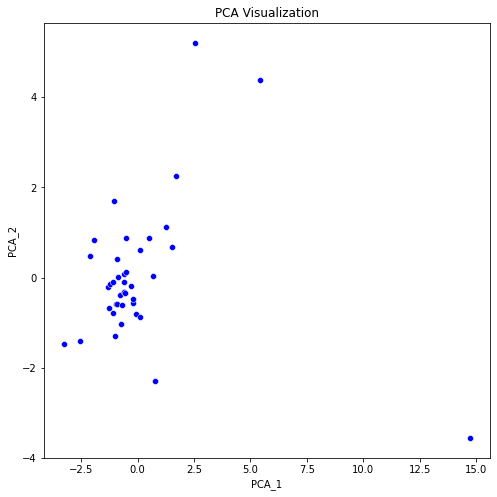

In [39]:
pca = PCA(n_components=2, random_state=SEED)
pca.fit(X_transform)
X_pca = pca.transform(X_transform)
X_pca = pd.DataFrame(X_pca, columns=['PCA_1', 'PCA_2'])
plt.figure(figsize=(8, 8)) 
sns.scatterplot(data=X_pca, x='PCA_1', y='PCA_2', color='blue').set_title('PCA Visualization');